In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
import numpy as np
x=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [7]:
x.shape

(768, 8)

In [8]:
class ANN_model(nn.Module):
    def __init__(self,ip_features,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.fc1=nn.Linear(ip_features,hidden1)
        self.fc2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)
        return x

In [9]:
torch.manual_seed(20)
model=ANN_model(ip_features=x.shape[1],out_features=2)
model.parameters

<bound method Module.parameters of ANN_model(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [10]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [11]:
epochs=500
losses=[]
for i in range(epochs):
    y_pred=model.forward(x_train)
    loss=loss_fn(y_pred,y_train)
    losses.append(loss)
    if i%10==0:
        print("Epoch Number: {} and Loss: {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch Number: 0 and Loss: 3.4572105407714844
Epoch Number: 10 and Loss: 0.8019207119941711
Epoch Number: 20 and Loss: 0.609032154083252
Epoch Number: 30 and Loss: 0.5917771458625793
Epoch Number: 40 and Loss: 0.5679708123207092
Epoch Number: 50 and Loss: 0.5529041886329651
Epoch Number: 60 and Loss: 0.5410094857215881
Epoch Number: 70 and Loss: 0.5310389995574951
Epoch Number: 80 and Loss: 0.5220361351966858
Epoch Number: 90 and Loss: 0.5135971903800964
Epoch Number: 100 and Loss: 0.5061254501342773
Epoch Number: 110 and Loss: 0.49834102392196655
Epoch Number: 120 and Loss: 0.49605512619018555
Epoch Number: 130 and Loss: 0.48286372423171997
Epoch Number: 140 and Loss: 0.4756035804748535
Epoch Number: 150 and Loss: 0.483346551656723
Epoch Number: 160 and Loss: 0.48827385902404785
Epoch Number: 170 and Loss: 0.46933698654174805
Epoch Number: 180 and Loss: 0.4662608802318573
Epoch Number: 190 and Loss: 0.45597580075263977
Epoch Number: 200 and Loss: 0.4466378688812256
Epoch Number: 210 an

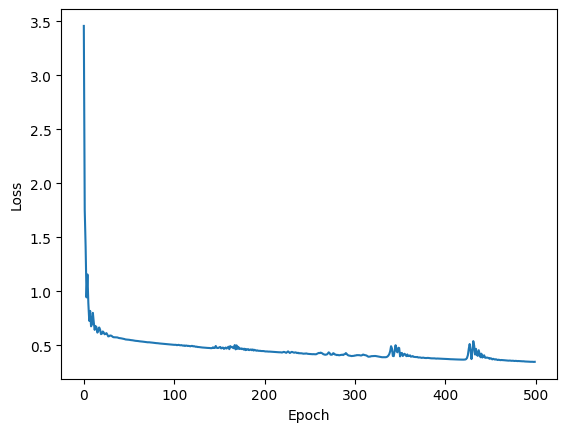

In [12]:
import matplotlib.pyplot as plt
with torch.no_grad():
    plt.plot(range(epochs),losses)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

In [13]:
preds=[]
with torch.no_grad():
    for i,data in enumerate(x_test):
        y_pred=model(data)
        preds.append(y_pred.argmax().item())

In [14]:
from sklearn.metrics import classification_report
with torch.no_grad():
    print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       107
           1       0.65      0.64      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.78      0.79      0.79       154



In [15]:
from sklearn.metrics import accuracy_score
with torch.no_grad():
    score=accuracy_score(y_test,preds)
    print(score)

0.7857142857142857


In [16]:
torch.save(model,'diabetes.pt')

In [17]:
model=torch.load('diabetes.pt')

In [18]:
model.eval()

ANN_model(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [19]:
test=torch.tensor(list(df.iloc[0,:-1]))
with torch.no_grad():
    pred = model(test).argmax().item()
    if pred:
        print("Diabetes")
    else:
        print("No Diabetes")

Diabetes
